## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [156]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [157]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [158]:
happiness_data_raw = pd.read_csv(HAPPINESS_DATASET)
countries_data_raw = pd.read_csv(COUNTRIES_DATASET)
countries_data_raw.rename(columns={'country_name':'country'}, inplace=True)
happiness_data_raw.loc[17,:]

country                           Burkina Faso
happiness_score                         4.7687
social_support                        0.712944
healthy_life_expectancy              53.889454
freedom_of_choices                    0.665564
generosity                           -0.019081
perception_of_corruption              0.739795
world_region                Sub-Saharan Africa
Name: 17, dtype: object

In [159]:
#Modifying the column used for merge in order to have the same in the two df
def custom_capitalize(s):
    return ' '.join(word.capitalize() for word in s.split())

countries_data_raw.loc[:,'country'] = countries_data_raw['country'].apply(lambda x: custom_capitalize(x))
countries_data_raw.loc[17,:]

country       Burkina Faso
area                274200
population        13902972
literacy              26,6
Name: 17, dtype: object

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [160]:
country_features = pd.merge(countries_data_raw, happiness_data_raw, left_on='country', right_on='country')
country_features['literacy'] = country_features['literacy'].str.replace(',','.')
country_features['literacy'] = pd.to_numeric(country_features['literacy'], errors='coerce')


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [161]:
top10happiest_countries = country_features[['country','happiness_score']].sort_values(ascending=False, by='happiness_score').head(10)
top10happiest_countries

,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of countries for each world region.
Sort the result to show the happiness ranking.

In [162]:
country_regions_data = country_features.set_index(['world_region','country']).sort_index()
happiness_score_region = country_regions_data.groupby('world_region')['happiness_score'].mean()
country_regions_data.reset_index(inplace=True)
countries_sum = country_regions_data.groupby('world_region')['country'].nunique().reset_index()
countries_sum.set_index(['world_region'], inplace=True)
countries_sum.head()


,country
world_region,
Central and Eastern Europe,14
Commonwealth of Independent States,12
East Asia,3
Latin America and Caribbean,20
Middle East and North Africa,16


In [163]:
happiness_ranking = pd.merge(countries_sum, happiness_score_region, left_index=True, right_index=True)
happiness_ranking.sort_values(ascending=False, by='happiness_score', inplace=True)

The first region has only a few countries! What are them and what is their score?

In [164]:
country_regions_data.set_index(['world_region','country'])
north_america = country_regions_data.query('world_region == @happiness_ranking.iloc[0].name')[['world_region','country','happiness_score']]
north_america.set_index(['world_region'], inplace=True)
north_america

,country,happiness_score
world_region,,
North America and ANZ,Australia,7.2228
North America and ANZ,Canada,7.2321
North America and ANZ,New Zealand,7.2996
North America and ANZ,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [172]:
country_features.set_index(['world_region'])
full_literacy = country_features.query('literacy == 100')
for index, row in full_literacy.iterrows():
    print(row['country'])
print("*******************************************")
for index, row in country_features.iterrows():
    print(f'{index} - {row["country"]}({row["literacy"]})')

Australia
Denmark
Finland
Luxembourg
Norway
*******************************************
0 - Afghanistan(36.0)
1 - Albania(86.5)
2 - Algeria(70.0)
3 - Argentina(97.1)
4 - Armenia(98.6)
5 - Australia(100.0)
6 - Austria(98.0)
7 - Azerbaijan(97.0)
8 - Bahrain(89.1)
9 - Bangladesh(43.1)
10 - Belarus(99.6)
11 - Belgium(98.0)
12 - Benin(40.9)
13 - Bolivia(87.2)
14 - Botswana(79.8)
15 - Brazil(86.4)
16 - Bulgaria(98.6)
17 - Burkina Faso(26.6)
18 - Burundi(51.6)
19 - Cambodia(69.4)
20 - Cameroon(79.0)
21 - Canada(97.0)
22 - Chad(47.5)
23 - Chile(96.2)
24 - China(90.9)
25 - Colombia(92.5)
26 - Comoros(56.5)
27 - Costa Rica(96.0)
28 - Croatia(98.5)
29 - Cyprus(97.6)
30 - Czech Republic(99.9)
31 - Denmark(100.0)
32 - Dominican Republic(84.7)
33 - Ecuador(92.5)
34 - Egypt(57.7)
35 - El Salvador(80.2)
36 - Estonia(99.8)
37 - Ethiopia(42.7)
38 - Finland(100.0)
39 - France(99.0)
40 - Gabon(63.2)
41 - Georgia(99.0)
42 - Germany(99.0)
43 - Ghana(74.8)
44 - Greece(97.5)
45 - Guatemala(70.6)
46 - Guinea(3

What is the global average?

In [192]:
literacy_global_average = country_features['literacy'].mean()
print(f"The global average is {literacy_global_average}%")

The global average is 81.85112781954888%


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [188]:
below50 = country_features.query('literacy < 50')
print(f'The proportion of country with literacy level below 50% is {len(below50)/len(country_features):.2f}')

The proportion of country with literacy level below 50% is 0.12


Print the raw number and the percentage of world population that is illiterate.

In [196]:
population = country_features.population.sum()
print(f'The total population represents {population:e} people')
print(f'The population that is illiterate represents {population * (100-literacy_global_average)/100:e} ')

The total population represents 6.145475e+09 people
The population that is illiterate represents 1.115334e+09 


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [198]:
country_features['population_density'] = country_features['population']/country_features['area']
country_features

,country,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,population_density
0,Afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,47.964474
1,Albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,124.587971
2,Algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,13.826065
3,Argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,14.428413
4,Armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,912050,25730435,93.4,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,28.211650
131,Vietnam,329560,84402966,90.3,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,256.108041
132,Yemen,527970,21456188,50.2,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,40.639029
133,Zambia,752614,11502010,80.6,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,15.282748


What is the happiness score of the 3 countries with the lowest population density?

In [203]:
country_features.sort_values(ascending=[False,False], by=['population','happiness_score'])[['country','happiness_score','population_density']].head(3)

,country,happiness_score,population_density
24,China,5.1239,136.915618
51,India,3.5733,333.177797
127,United States,6.9396,30.986523


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

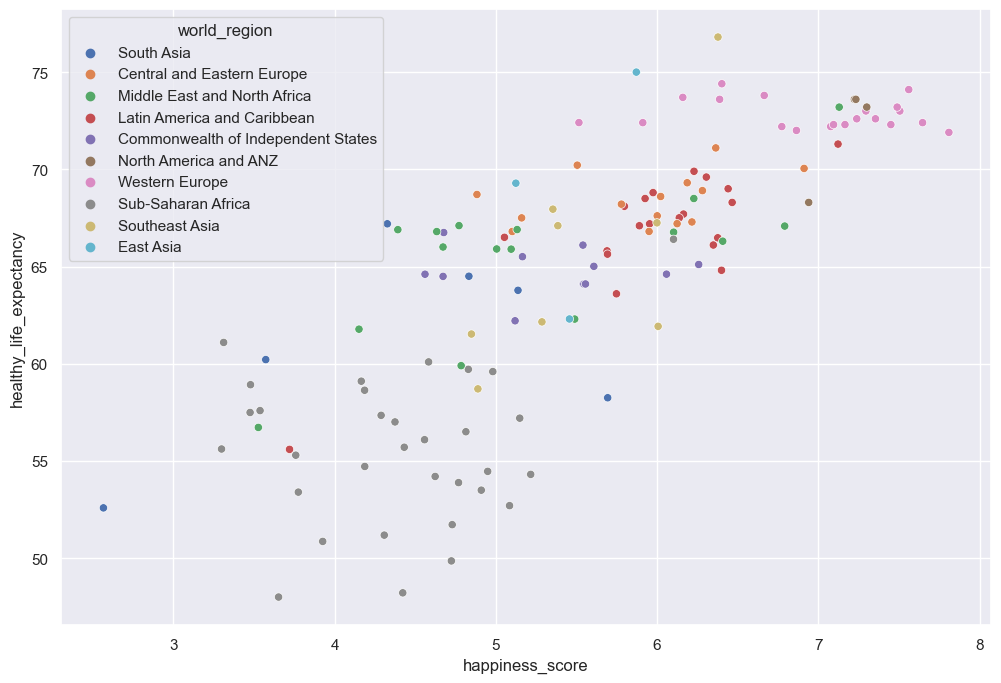

In [227]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(data=country_features,x='happiness_score' ,y='healthy_life_expectancy', hue='world_region')



Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.